Now we will create a train test split and perform some EDA

# Train Test Split

In [1]:
import pandas as pd
import numpy as np

In [2]:
## we will initially work with the cleaned data set
coffee = pd.read_csv('../data/coffee.csv')

In [3]:
coffee.head()

,Country_of_Origin,Processing_Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,1950.0,2200.0,2075.0
1,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,1950.0,2200.0,2075.0
2,Guatemala,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,1600.0,1800.0,1700.0
3,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,1800.0,2200.0,2000.0
4,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,1950.0,2200.0,2075.0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
## we can see the countries included after cleaning the data and setting a cutoff for minimum number of entries per country
coffee.Country_of_Origin.value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         52
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Thailand                         32
Nicaragua                        26
Uganda                           26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
Malawi                           11
Peru                             10
Name: Country_of_Origin, dtype: int64

In [6]:
## Make the split
coffee_train, coffee_test = train_test_split(coffee.copy(),
                                            shuffle=True,
                                            random_state=47,
                                            test_size = .2,
                                            stratify=coffee['Country_of_Origin'])

In [7]:
coffee_test.Country_of_Origin.value_counts()

Mexico                          47
Colombia                        37
Guatemala                       36
Brazil                          27
United States (Hawaii)          15
Taiwan                          15
Honduras                        11
Costa Rica                      10
Ethiopia                         9
Tanzania, United Republic Of     8
Thailand                         6
Kenya                            5
Uganda                           5
Nicaragua                        5
El Salvador                      4
Indonesia                        4
China                            3
Peru                             2
Malawi                           2
Name: Country_of_Origin, dtype: int64

After performing the split, we can see how many entries each country has in the test set. Because we stratified by country of origin, the proportion of each country should be similar to the original data set.

In [8]:
## import some additional packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

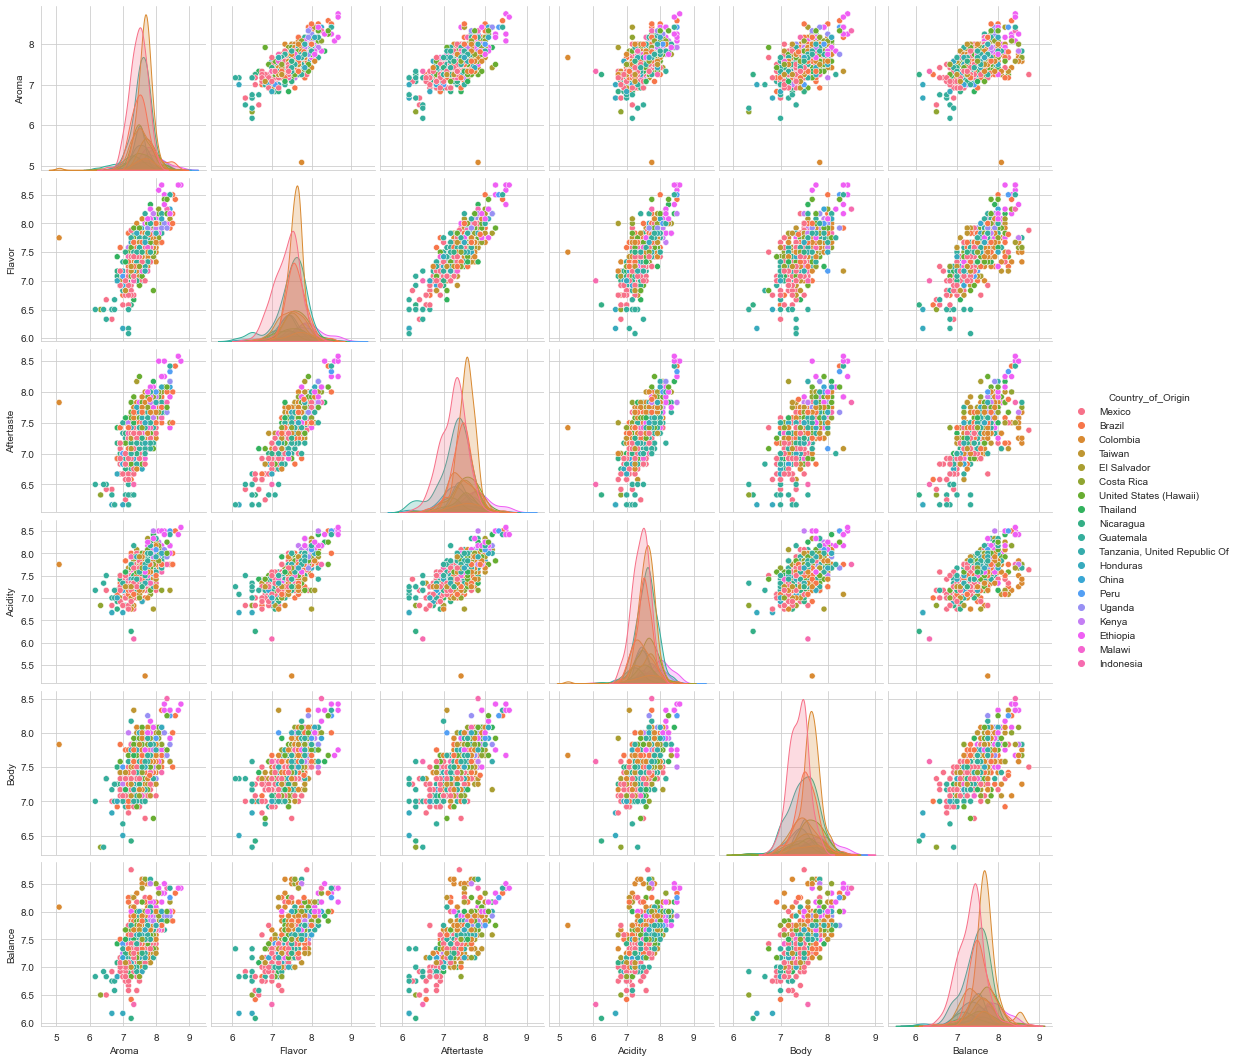

In [9]:
##make an initial pairplot to look at relationships between ratings and how they relate to the country of origin
sns.pairplot(coffee_train, vars = ["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"],  hue = "Country_of_Origin")

## Summary
Here we see that the ratings generally have a positive trend when looking pairwise. When looking at the diagonals, we see some promise that the model may be able to separate the data. The spreads for Mexico seem to be slightly different than the spreads for Colombia. However, the rest of the countries appear to sit somewhere in the middle and contain fewer samples overall. We will attempt to use these rating variables to predict the country of origin, but based on the overlap and strong positive correlation between the variables, we may face some difficulty in successfully separating the countries.